In [1]:
import cv2

In [2]:
from darkflow.net.build import TFNet

/home/admin238/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [3]:
import matplotlib.pyplot as plt

In [4]:
%config InlineBackend.figure_format = 'svg'

In [5]:
options ={
    'model':'cfg/yolo.cfg',
    'load' : 'bin/yolo.weights',
    'threshold': 0.3
    
}


In [6]:
tfnet = TFNet(options)

Parsing ./cfg/yolo.cfg
Parsing cfg/yolo.cfg
Loading bin/yolo.weights ...
Successfully identified 203934260 bytes
Finished in 0.14017677307128906s
Model has a coco model name, loading coco labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
Instructions for updating:
Colocations handled automatically by placer.
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Ye

0
******
Top Left: (451, 281)
Bottom right: (653, 413)
label: car
confidence:  53.46578359603882


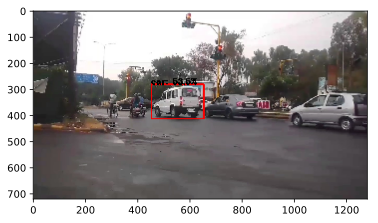

1
******
Top Left: (631, 330)
Bottom right: (680, 381)
label: car
confidence:  39.26041126251221


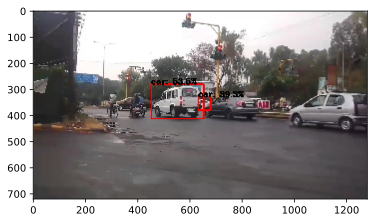

2
******
Top Left: (650, 315)
Bottom right: (873, 420)
label: car
confidence:  70.9809958934784


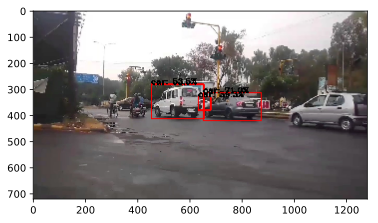

3
******
Top Left: (177, 352)
Bottom right: (299, 439)
label: car
confidence:  31.982028484344482


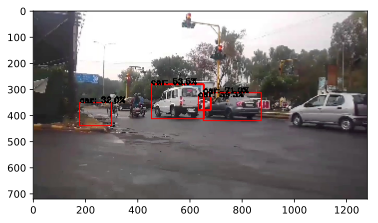

4
******
Top Left: (972, 307)
Bottom right: (1272, 464)
label: car
confidence:  80.94601035118103


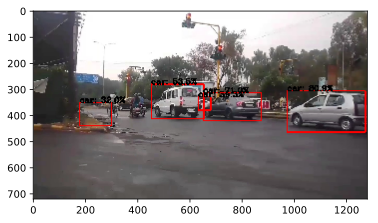

5
******
Top Left: (389, 331)
Bottom right: (444, 408)
label: motorbike
confidence:  32.77102708816528


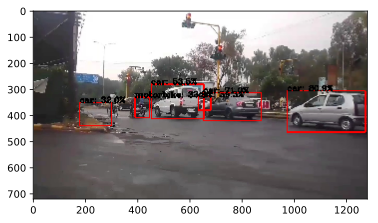

6
******
Top Left: (462, 266)
Bottom right: (668, 406)
label: truck
confidence:  43.88456046581268


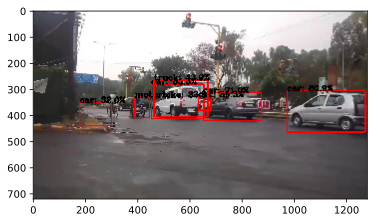

7
******
Top Left: (608, 264)
Bottom right: (704, 364)
label: truck
confidence:  33.221858739852905


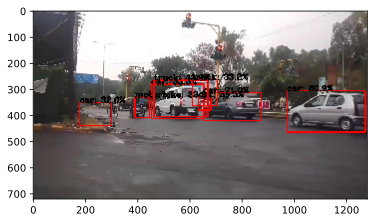

8
******
Top Left: (578, 9)
Bottom right: (612, 54)
label: traffic light
confidence:  41.298097372055054


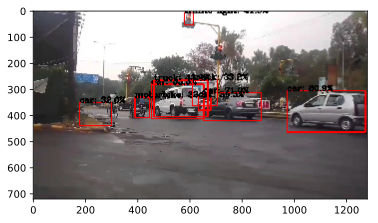

9
******
Top Left: (570, 25)
Bottom right: (606, 72)
label: traffic light
confidence:  38.17453980445862


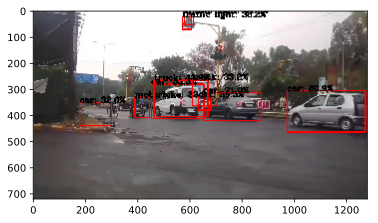

10
******
Top Left: (693, 137)
Bottom right: (734, 193)
label: traffic light
confidence:  49.467483162879944


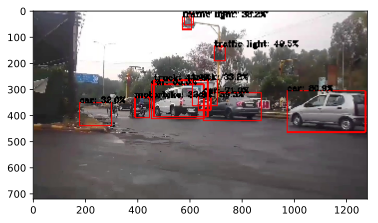

In [7]:
# read the color image and covert to RGB

img = cv2.imread('traffic5.jpg', cv2.IMREAD_COLOR)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# use YOLO to predict the image
result = tfnet.return_predict(img)

for r in range(len(result)):
    print(r)
    print("******")
    
    # pull out some info from the results

    tl = (result[r]['topleft']['x'], result[r]['topleft']['y'])
    br = (result[r]['bottomright']['x'], result[r]['bottomright']['y'])
    label = result[r]['label']
    confidence = result[r]['confidence']*100

    print("Top Left:",tl)
    print("Bottom right:",br)
    print("label:",label)
    print("confidence: ",confidence)

    text = '{}: {:0.1f}%'.format(label,confidence)
    
    # add the box and label and display it
    img = cv2.rectangle(img, tl, br, (255, 0, 0), 3)
    img = cv2.putText(img, text, tl, cv2.FONT_HERSHEY_COMPLEX ,1, (0, 0, 0), 3)
    plt.imshow(img) 
    plt.show()

In [37]:
img.dtype

dtype('uint8')

In [38]:
img.shape

(720, 1280, 3)